In [172]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


%matplotlib inline

## Exploracion general

In [173]:
young = pd.read_csv('./diario.csv', sep=';')

In [174]:
young.head()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha
0,2,2,3,3,3,3,NaN,34,150,No,No,06:30,23:40,D,1/6/2017
1,2,2,3,3,3,3,NaN,38,150,NO,No,06:45,00:15,D,2/6/2017
2,2,1,3,3,3,3,NaN,39,120,NO,No,07:00,00:15,D,3/6/2017
3,1,2,2,2,2,3,NaN,34,120,No,No,07:00,01:30,D,4/6/2017
4,1,1,3,2,2,2,NaN,32,150,No,No,07:00,23:45,D,5/6/2017


In [175]:
young.describe()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,0.0,665.000000,665.000000
mean,-0.613534,-0.789474,1.670677,1.458647,1.560902,1.609023,NaN,18.248120,99.950376
std,1.082221,1.051767,0.745345,0.786858,0.804527,0.841637,NaN,19.657537,59.176113
min,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,-1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,90.000000
50%,-1.000000,-1.000000,2.000000,1.000000,1.000000,1.000000,NaN,20.000000,90.000000
75%,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,NaN,26.000000,120.000000
max,3.000000,3.000000,4.000000,5.000000,4.000000,5.000000,NaN,400.000000,903.000000


In [176]:
young.shape

(665, 15)

In [177]:
young.count()

Estado de ánimo                          665
Motivación                               665
Problemas de concentración y atención    665
Irritabilidad                            665
Ansiedad                                 665
Calidad del sueño                        665
Ciclo menstrual                            0
Número de cigarrillos                    665
Cafeína                                  665
Alcohol                                  659
Otras drogas                             659
Hora de despertar                        665
Hora a la que te dormiste                665
Código                                   665
Fecha                                    663
dtype: int64

In [178]:
young.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Estado de ánimo                        665 non-null    int64  
 1   Motivación                             665 non-null    int64  
 2   Problemas de concentración y atención  665 non-null    int64  
 3   Irritabilidad                          665 non-null    int64  
 4   Ansiedad                               665 non-null    int64  
 5   Calidad del sueño                      665 non-null    int64  
 6   Ciclo menstrual                        0 non-null      float64
 7   Número de cigarrillos                  665 non-null    int64  
 8   Cafeína                                665 non-null    int64  
 9   Alcohol                                659 non-null    object 
 10  Otras drogas                           659 non-null    object 
 11  Hora d

## Exploracion especifica

In [179]:
young['Estado de ánimo'].value_counts()

 0    258
-1    191
-2    121
 1     54
-3     23
 2     14
 3      4
Name: Estado de ánimo, dtype: int64

In [180]:
young['Motivación'].value_counts()

-1    234
 0    217
-2    149
 1     22
-3     21
 2     18
 3      4
Name: Motivación, dtype: int64

In [181]:
young['Problemas de concentración y atención'].value_counts()

1    306
2    260
3     87
4      6
0      6
Name: Problemas de concentración y atención, dtype: int64

In [182]:
young['Irritabilidad'].value_counts()

1    446
2    127
3     71
4     13
0      7
5      1
Name: Irritabilidad, dtype: int64

In [183]:
young['Ansiedad'].value_counts()

1    396
2    158
3     94
4     11
0      6
Name: Ansiedad, dtype: int64

In [184]:
young['Calidad del sueño'].value_counts()

1    364
2    199
3     70
4     22
0      8
5      2
Name: Calidad del sueño, dtype: int64

In [185]:
young['Número de cigarrillos'].value_counts()

0      184
26      71
28      44
24      43
20      34
34      33
32      28
18      24
17      23
22      19
16      15
15      13
19      12
23      12
36      12
21      11
25      11
14      10
27       9
38       9
29       7
13       7
12       7
30       6
10       4
33       3
40       3
11       3
2        3
39       2
31       1
119      1
400      1
Name: Número de cigarrillos, dtype: int64

In [186]:
young['Cafeína'].value_counts()

90     396
120    103
60      36
180     35
150     34
0       29
30       9
200      6
100      4
300      3
6        2
20       2
9        1
250      1
901      1
903      1
1        1
21       1
Name: Cafeína, dtype: int64

In [187]:
# HAY QUE CORREGIR ESTO
young['Alcohol'].value_counts()

No    654
NO      2
Si      2
no      1
Name: Alcohol, dtype: int64

# TODO:
- Drop ciclo menstrual
- Corregir Alcohol y pasarlo a binario

In [188]:
young=young.drop("Ciclo menstrual",1)

C:\Users\cris_\AppData\Local\Temp/ipykernel_5084/1790516259.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  young=young.drop("Ciclo menstrual",1)


In [189]:
young=young.replace(to_replace="No", value=0)
young = young.replace(to_replace="Si", value=1)
young=young.replace(to_replace="NO", value=0)
young=young.replace(to_replace="no", value=0)
young = young.replace(to_replace="SI", value=1)

In [190]:
young

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha
0,2,2,3,3,3,3,34,150,0.0,0.0,06:30,23:40,D,1/6/2017
1,2,2,3,3,3,3,38,150,0.0,0.0,06:45,00:15,D,2/6/2017
2,2,1,3,3,3,3,39,120,0.0,0.0,07:00,00:15,D,3/6/2017
3,1,2,2,2,2,3,34,120,0.0,0.0,07:00,01:30,D,4/6/2017
4,1,1,3,2,2,2,32,150,0.0,0.0,07:00,23:45,D,5/6/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,3,-2,4,4,4,4,0,300,1.0,0.0,05:00,23:00,G,16/04/2023
661,-3,2,1,0,1,0,0,200,0.0,0.0,02:00,23:00,G,17/04/2023
662,3,2,1,3,3,3,2,300,0.0,1.0,08:00,23:00,G,17/04/2023
663,-3,-1,3,1,3,2,15,100,0.0,0.0,08:00,23:00,M,17/04/2023


# HISTOGRAMAS:

C:\Users\cris_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cris_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cris_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

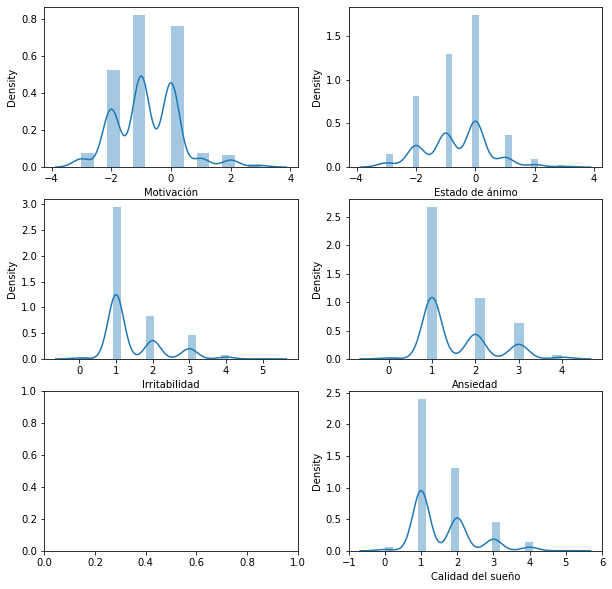

In [191]:
f, axes = plt.subplots(3, 2,figsize=(10,10))
sns_plot1 = sns.distplot(young['Motivación'],ax=axes[0,0])
sns_plot2 = sns.distplot(young['Estado de ánimo'],ax=axes[0,1])
sns_plot3 = sns.distplot(young['Irritabilidad'],ax=axes[1,0])
sns_plot4 = sns.distplot(young['Ansiedad'],ax=axes[1,1])
sns_plot5 = sns.distplot(young['Calidad del sueño'],ax=axes[2,1])





# Relación por pares de datos

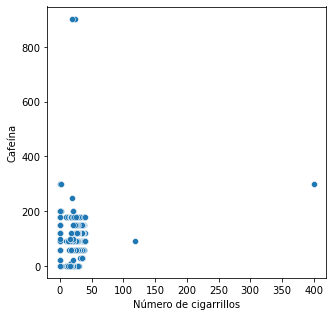

In [192]:
f, axes = plt.subplots(1, 1,figsize=(5,5))
a = sns.scatterplot(data=young,x='Número de cigarrillos',y='Cafeína')

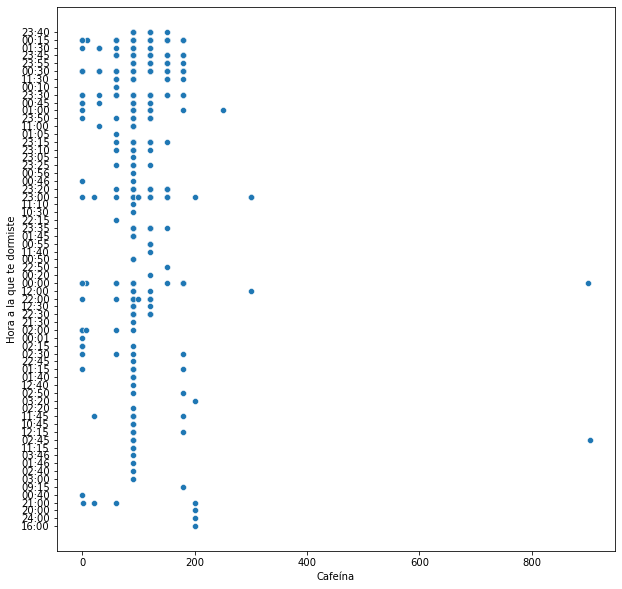

In [193]:
f, axes = plt.subplots(1, 1,figsize=(10,10))
a = sns.scatterplot(data=young,x='Cafeína',y='Hora a la que te dormiste')


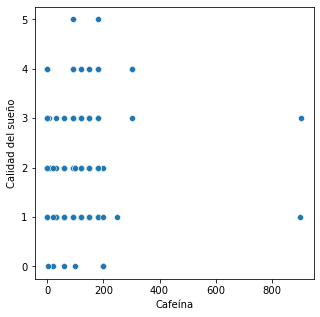

In [194]:
f, axes = plt.subplots(1, 1,figsize=(5,5))
a = sns.scatterplot(data=young,x='Cafeína',y='Calidad del sueño')

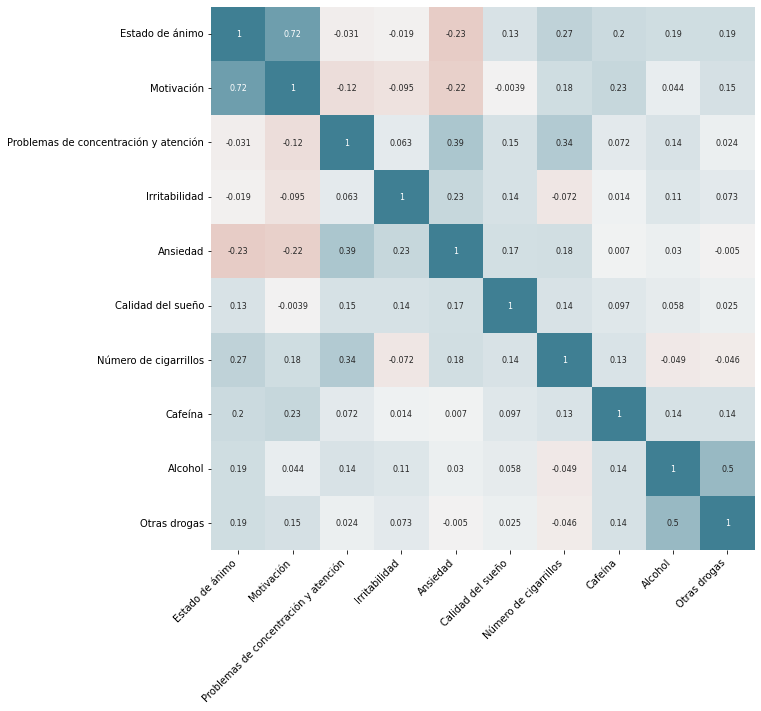

In [196]:
young1=young.drop(columns=["Código","Fecha","Hora de despertar","Hora a la que te dormiste"])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

b=sns.heatmap(
    young.corr(),
    annot= True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Conclusiones:
Correlatividades:

Fuertes:
Alcohol-Drogas
Motivación-Estado de ánimo
         
Moderadas: 
Problemas de Atencion-Cigarrillos

Debiles:
Calidad de sueño- Irritabilidad

Cigarrillos- Ansiedad
         
Motivación-Cafeína
         
Cafeína-Alcohol
         
Cigarrillo-Animo
         
           

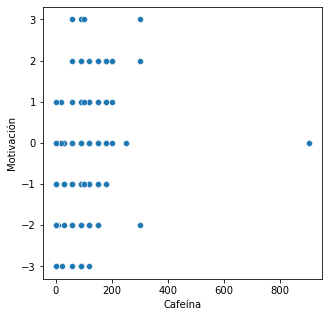

In [197]:
f, axes = plt.subplots(1, 1,figsize=(5,5))
a = sns.scatterplot(data=young,x='Cafeína',y='Motivación')

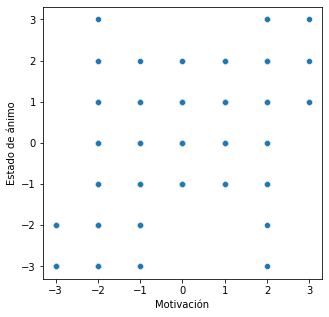

In [198]:
f, axes = plt.subplots(1, 1,figsize=(5,5))
a = sns.scatterplot(data=young,x='Motivación',y='Estado de ánimo')

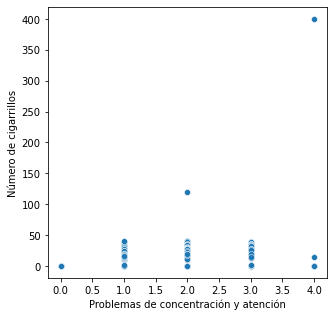

In [199]:
f, axes = plt.subplots(1, 1,figsize=(5,5))
a = sns.scatterplot(data=young,x='Problemas de concentración y atención',y='Número de cigarrillos')

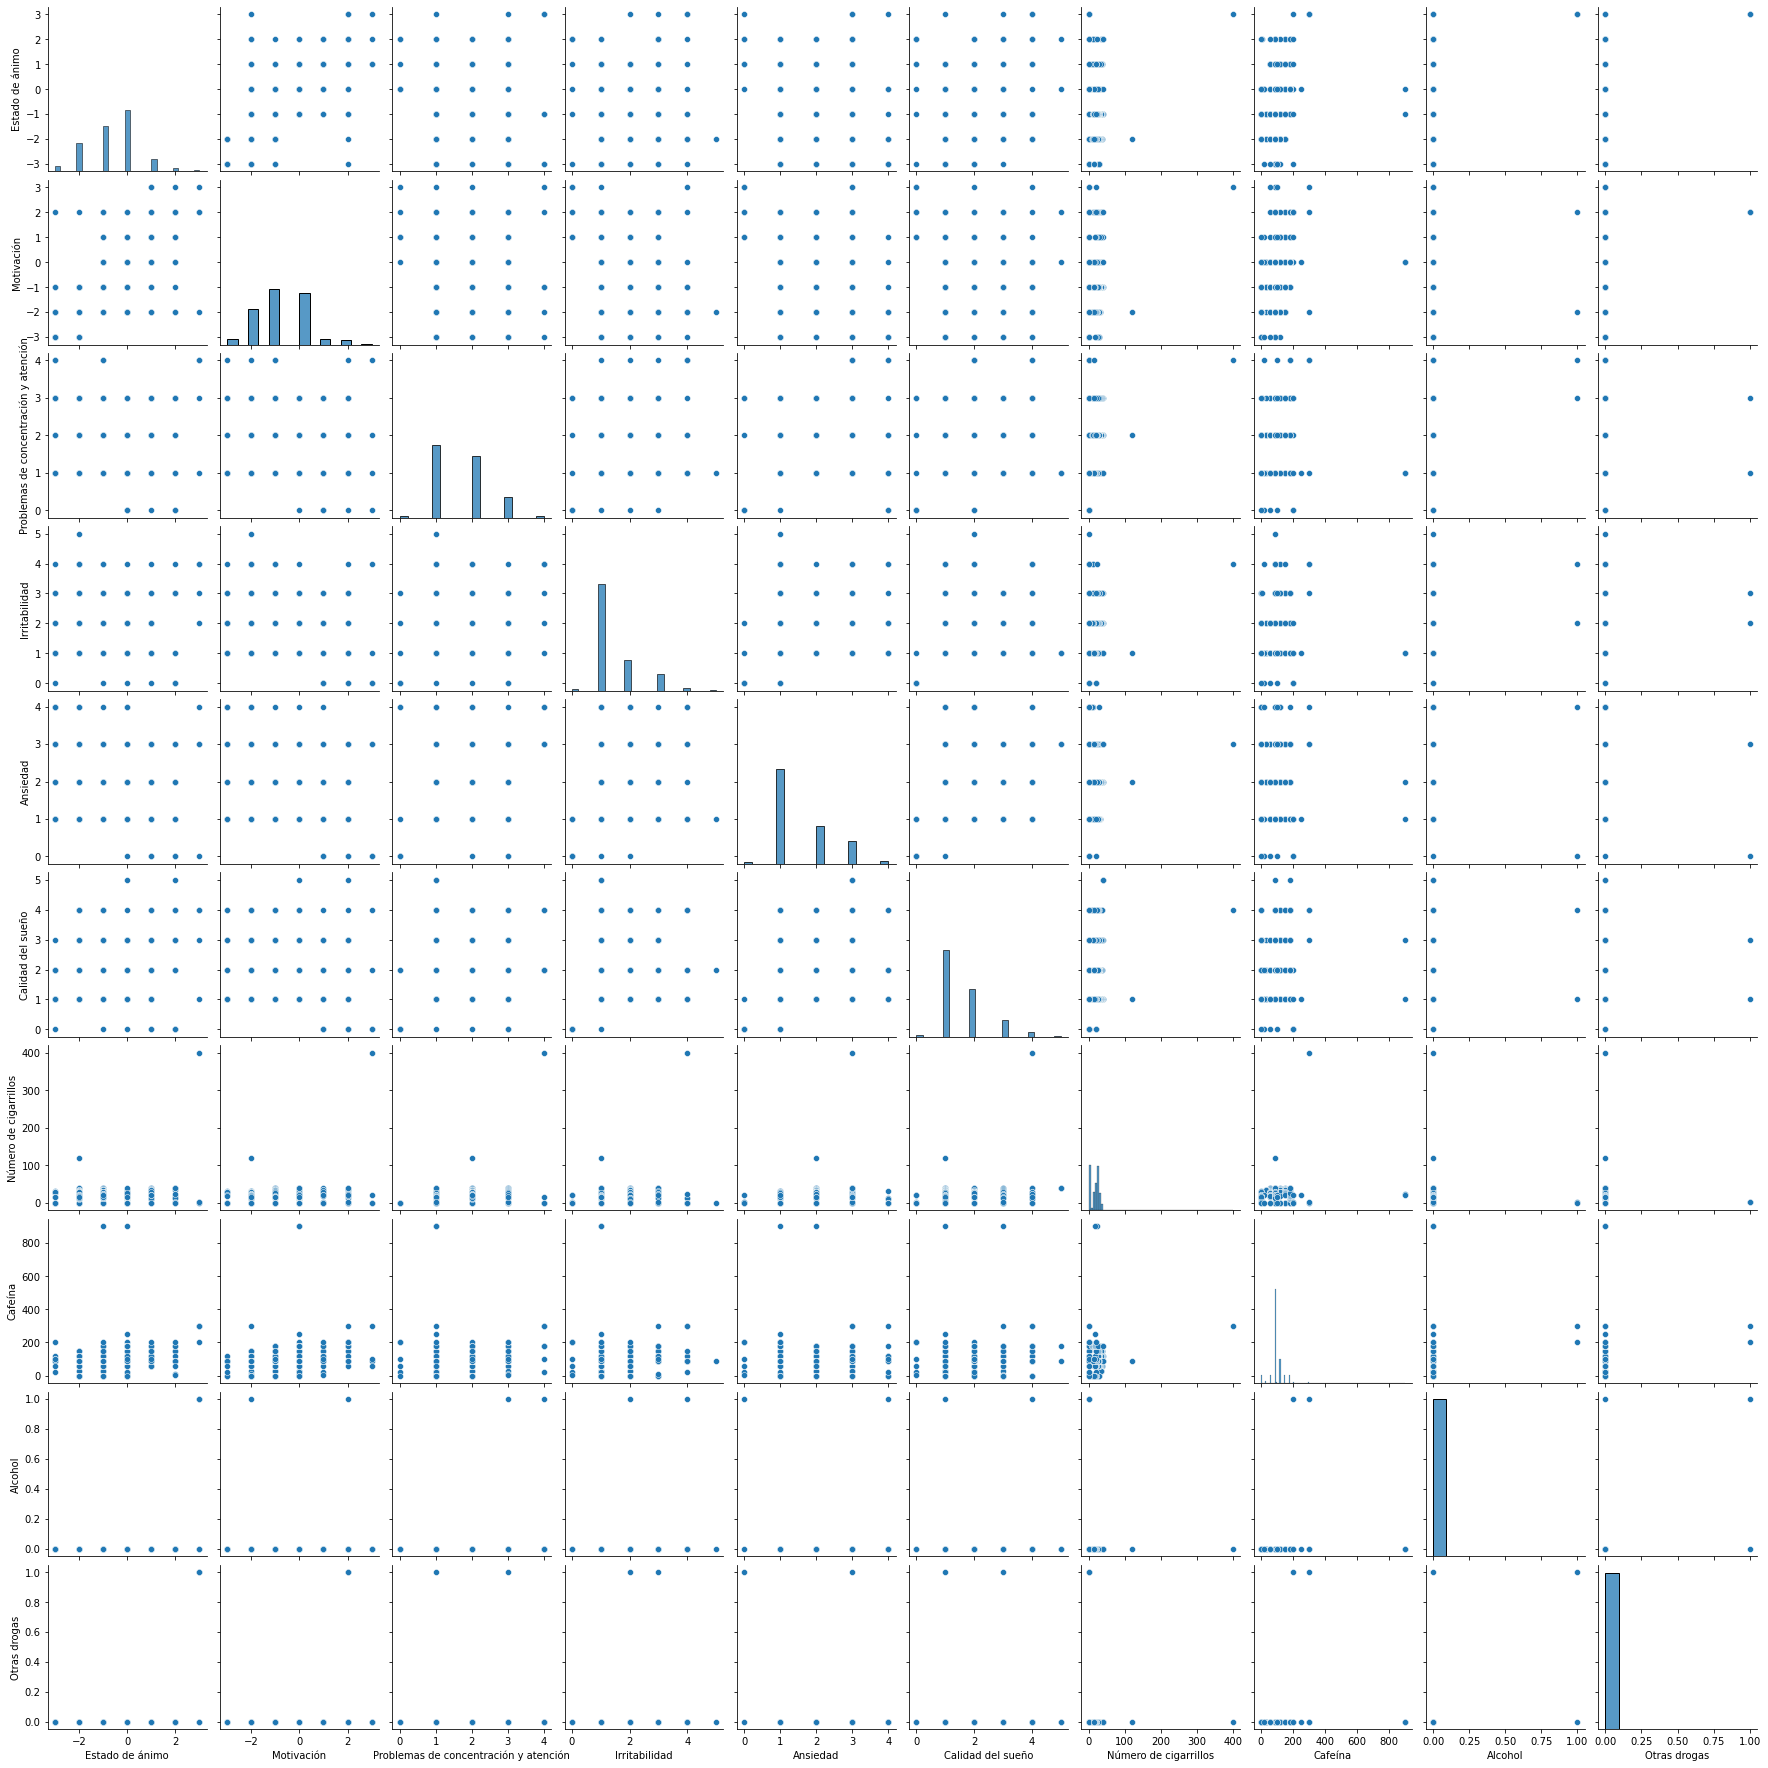

In [200]:
sns.pairplot(young1)